<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("MultipleLR.csv", header = None)

In [3]:
df.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [4]:
df_arr = np.array(df)

In [5]:
df_arr

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]], dtype=int64)

In [6]:
df_x = df.iloc[:,0:3]

In [7]:
X = np.array(df_x)
print(X)

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]


In [8]:
df_y = df.iloc[:,3]

In [9]:
y = np.array(df_y)

In [10]:
y

array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
       152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192],
      dtype=int64)

In [11]:
def  cal_cost(theta,X,y): 
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

### Batch - Adam - Gradient Descent

In [12]:
def batch_adam_GD(X, y, theta, learning_rate=0.1, epsilon =1e-8, beta1 = 0.9, beta2 = 0.9, max_iterations=100):
    
    
    m = len(y)
    
    #Lists of (cost , thetas, gradients)
    cost_list = np.zeros(max_iterations)
    theta_list = np.zeros((max_iterations,4))
    gd_list = []
    
    #Current V
    v_thetas = np.zeros(len(X[0]))
    
    #Current M
    m_thetas = np.zeros(len(X[0]))
    #The First for loop , loops over epochs
    for it in range(0,max_iterations):
        
        prediction = np.dot(X,theta)
        
        gd =  X.T.dot((prediction - y))
        gd_list.append(gd)
        
        m_thetas = (beta1 * m_thetas) + (1 - beta1)*(gd)
        
        v_thetas = (beta2 * v_thetas) + (1-beta2)*(gd)**2
        
        m_hat = m_thetas/(1-(beta1**(it+1)))
        v_hat = v_thetas/(1-(beta2**(it+1)))
        
        theta = theta - (learning_rate/(np.sqrt(v_hat)+epsilon))* m_hat
        
        theta_list[it,:] = theta.T
        
        cost = cal_cost(theta,X,y)
        cost_list[it] = cost
        
        if(it>0):
            if abs(cost_list[it-1] - cost_list[it] < 0.001):
                break
            if abs(np.linalg.norm([gd_list[it-1]])-np.linalg.norm([gd_list[it]]))< 0.001:
                break
        
    return theta, cost_list[:it], theta_list[:it], it

In [13]:
lr = 0.001
n_iter = 1000
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.9

theta = np.zeros(len(X[0])+1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history,it = batch_adam_GD(X_b,y,theta,lr,epsilon, beta1,beta2 ,n_iter)
print("The Number of Iterations : ", it)
print("The Thetas : " , theta)
print("The Cost History : ", cost_history)
print("The Theta History : ", theta_history)

The Number of Iterations :  677
The Thetas :  [0.67315204 0.67311209 0.67309869 0.67338631]
The Cost History :  [8.35384844e+06 8.32899643e+06 8.30418147e+06 8.27940356e+06
 8.25466272e+06 8.22995893e+06 8.20529221e+06 8.18066256e+06
 8.15606999e+06 8.13151449e+06 8.10699607e+06 8.08251474e+06
 8.05807049e+06 8.03366333e+06 8.00929327e+06 7.98496029e+06
 7.96066441e+06 7.93640563e+06 7.91218394e+06 7.88799936e+06
 7.86385187e+06 7.83974148e+06 7.81566818e+06 7.79163199e+06
 7.76763290e+06 7.74367090e+06 7.71974600e+06 7.69585820e+06
 7.67200749e+06 7.64819388e+06 7.62441736e+06 7.60067793e+06
 7.57697559e+06 7.55331034e+06 7.52968218e+06 7.50609111e+06
 7.48253712e+06 7.45902021e+06 7.43554038e+06 7.41209763e+06
 7.38869196e+06 7.36532337e+06 7.34199185e+06 7.31869740e+06
 7.29544002e+06 7.27221971e+06 7.24903648e+06 7.22589030e+06
 7.20278120e+06 7.17970915e+06 7.15667417e+06 7.13367625e+06
 7.11071539e+06 7.08779158e+06 7.06490484e+06 7.04205515e+06
 7.01924251e+06 6.99646693e+06 6.9

In [14]:
y_pred = np.dot(X_b, theta)

In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9781726023596896

Text(0, 0.5, 'Loss')

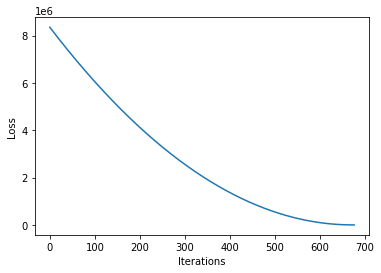

In [16]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Cost')

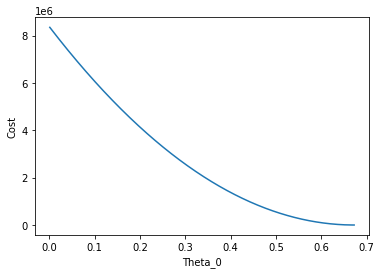

In [17]:
plt.plot(np.array(theta_history)[:, 0],cost_history)
plt.xlabel("Theta_0")
plt.ylabel("Cost")


Text(0, 0.5, 'Cost')

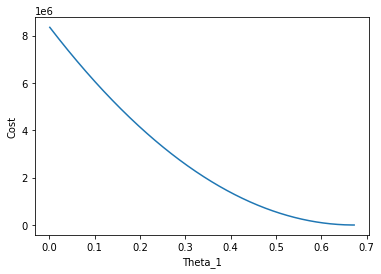

In [18]:
plt.plot(np.array(theta_history)[:, 1],cost_history)
plt.xlabel("Theta_1")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

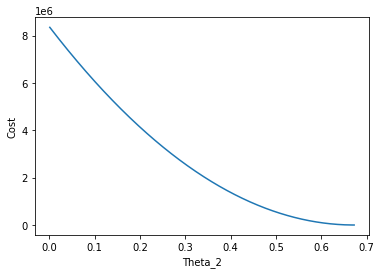

In [19]:
plt.plot(np.array(theta_history)[:, 2],cost_history)
plt.xlabel("Theta_2")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

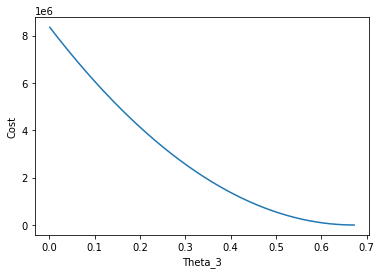

In [20]:
plt.plot(np.array(theta_history)[:, 3],cost_history)
plt.xlabel("Theta_3")
plt.ylabel("Cost")

### Mini Batch - Adam - Gradient Descent

In [21]:
def mini_batch_adam_GD(X, y, theta, learning_rate=0.1, epsilon =1e-8, beta1 = 0.9, beta2 = 0.9, max_iterations=100, batch_size =20):
    
    
    m = len(y)
    
    #Lists of (cost , thetas, gradients)
    cost_list = np.zeros(max_iterations)
    theta_list = np.zeros((max_iterations,4))
    gd_list = []
    
    #Number of batches 
    n_batches = int(m/batch_size)
    
    #Current V
    v_thetas = np.zeros(len(X[0]))
    
    #Current M
    m_thetas = np.zeros(len(X[0]))
    
    #The First for loop , loops over epochs
    for it in range(max_iterations):
        cost = 0.0
        
        #Shuffle The Data Points
        batch_indices = np.random.permutation(m)
        
        X = X[batch_indices]
        y = y[batch_indices]
        
        #The Second for loop , loops over every batch
        for i in range(0,m,batch_size):
            
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            prediction = np.dot(X_i,theta)
            
            gd =  X_i.T.dot((prediction - y_i))
            gd_list.append(gd)
            
            m_thetas = (beta1 * m_thetas) + (1 - beta1)*(gd)
            v_thetas = (beta2 * v_thetas) + (1-beta2)*(gd)**2
            
            m_hat = m_thetas/(1-(beta1**(i+1)))
            v_hat = v_thetas/(1-(beta2**(i+1)))
            
            theta = theta - (learning_rate/(np.sqrt(v_hat)+epsilon))* m_hat
            theta_list[it,:] = theta.T
            
            cost += cal_cost(theta,X_i,y_i)
        cost_list[it]  = cost
       
        if(it>0):
            
            if abs(cost_list[it-1] - cost_list[it] < 0.001):
                break
            if abs(np.linalg.norm([gd_list[it-1]])-np.linalg.norm([gd_list[it]]))< 0.001:
                break
            

                
    return theta, cost_list[:it], theta_list[:it], it

In [22]:
lr = 0.001
n_iter = 1000
batch = 4
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.9

theta = np.zeros(len(X[0])+1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history,it = mini_batch_adam_GD(X_b,y,theta,lr,epsilon, beta1,beta2 ,n_iter,batch)
print("The Number of Iterations : ", it)
print("The Thetas : " , theta)
print("The Cost History : ", cost_history)
print("The Theta History : ", theta_history)


The Number of Iterations :  70
The Thetas :  [0.68131309 0.67717429 0.67676339 0.6772833 ]
The Cost History :  [1.29531432e+06 1.28202267e+06 1.23694809e+06 1.18119347e+06
 1.14972905e+06 1.14605000e+06 1.08459379e+06 1.04572301e+06
 1.02081084e+06 9.82707118e+05 9.57071620e+05 9.23888053e+05
 8.97953176e+05 8.49973239e+05 8.19490274e+05 7.93056497e+05
 7.75997440e+05 7.54834446e+05 7.15912553e+05 6.97915523e+05
 6.63301872e+05 6.30641158e+05 6.01702088e+05 5.84392356e+05
 5.58550712e+05 5.40716373e+05 5.09767847e+05 4.90134749e+05
 4.64434656e+05 4.41639049e+05 4.17781226e+05 3.95468577e+05
 3.74674156e+05 3.53285625e+05 3.36114305e+05 3.11831161e+05
 3.00284866e+05 2.81681676e+05 2.61391285e+05 2.47092327e+05
 2.26814537e+05 2.15511307e+05 1.98113744e+05 1.82179589e+05
 1.71271465e+05 1.55228265e+05 1.42125049e+05 1.32335916e+05
 1.21236743e+05 1.08053121e+05 9.74233598e+04 8.74237022e+04
 7.89744153e+04 6.98871781e+04 6.06043510e+04 5.26126389e+04
 4.62007765e+04 3.83221130e+04 3.33

In [23]:
y_pred = np.dot(X_b, theta)

In [24]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.975959990260582

Text(0, 0.5, 'Loss')

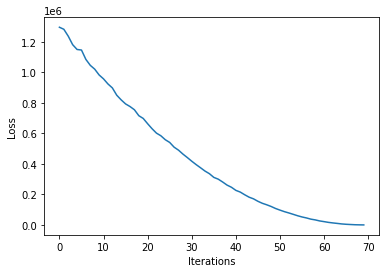

In [25]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Cost')

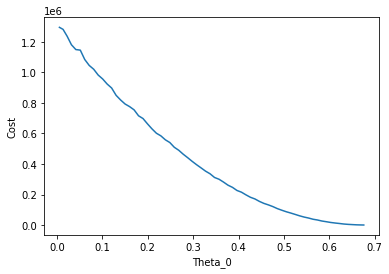

In [26]:
plt.plot(np.array(theta_history)[:, 0],cost_history)
plt.xlabel("Theta_0")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

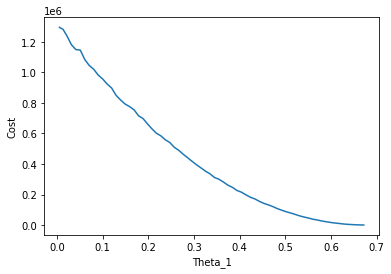

In [27]:
plt.plot(np.array(theta_history)[:, 1],cost_history)
plt.xlabel("Theta_1")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

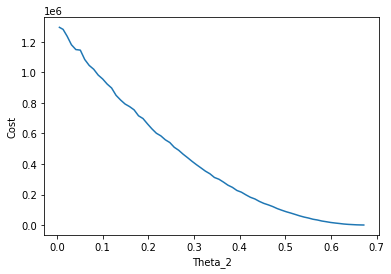

In [28]:
plt.plot(np.array(theta_history)[:, 2],cost_history)
plt.xlabel("Theta_2")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

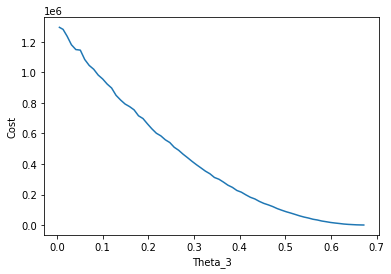

In [29]:
plt.plot(np.array(theta_history)[:, 3],cost_history)
plt.xlabel("Theta_3")
plt.ylabel("Cost")